## Logistic regression

In this lab you will get some hands-on experience with one of the most popular classification methods: logistic regression. In the problem of binary classification, it can be used to predict the probability that an instance $\mathbf{x}_{i}$ belongs to a certain class (e.g. $+1$). 

### Exercise 1

In the first exercise we want you to implement a logistic regression classifier by yourself and compare this model to sklearn's implementation of logistic regression. First let's generate some data that is easily seperable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
num_observations = 2000

x_class1 = np.random.multivariate_normal([0, 0], [[1, .25],[.25, 1]], num_observations)
x_class2 = np.random.multivariate_normal([1, 4], [[1, .25],[.25, 1]], num_observations)

# Training data:
X_train = np.vstack((x_class1, x_class2)).astype(np.float32)
y_train = np.hstack((np.zeros(num_observations), np.ones(num_observations))) # labels are 0, 1

If we plot the data, we see it is linearly seperable.

(4000,)

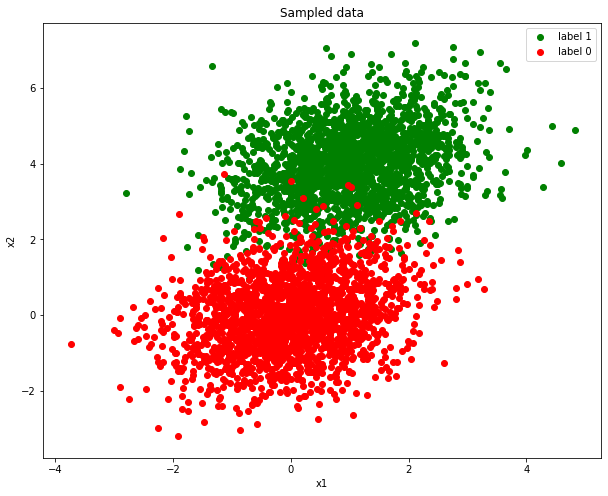

In [2]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='green', label='label 1')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='red', label='label 0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Sampled data')
plt.legend()
y_train.shape

## Part 1 (Gradient descent)
Let $\mathbf{x} \in \mathbb{R}^{d}$,  $y \in \{0,1\}$ be some training example and $\mathbf{X} \in \mathbb{R}^{n\times d}$, $\bf{y} \in \mathbb{R}^{n}$ be the training data set. In logistic regression the weights $\mathbf{w}$ of a simple linear model $\mathbf{w}^T\mathbf{x}$ are learned by minimizing the negative log likelihood of the training data. The likelihood can be written as:
$$p(\mathbf{y}|\mathbf{X},\mathbf{w}) = \prod_{i|y_i = 1} \frac{\exp(\mathbf{w}^T\mathbf{x}_i)}{1+\exp(\mathbf{w}^T\mathbf{x}_i)} \prod_{i|y_i = 0} \frac{1}{1+\exp(\mathbf{w}^T\mathbf{x}_i)},$$
then we obtain the log likelihood 
$$\log p(\mathbf{y}|\mathbf{X},\mathbf{w}) = \sum_i (y_i \mathbf{w}^T\mathbf{x}_i - \log(1 + \exp(\mathbf{w}^T \mathbf{x}_i)))$$

Since there is no analytic solution for this problem, we need to perform numeric optimization, e.g. gradient descent, in order to find the optimal weights $\mathbf{w}^* = \arg \min_{\mathbf{w}} - \log p(\mathbf{y}|\mathbf{X},\mathbf{w})$.  

Try to understand the following function logistic_regression(X, y, num_steps, learning_rate, add_intercept).
A few functions are missing by now: sigmoid(), log_likelihood(), log_likelihood_gradient(). These have to be implemented in the next exercises.

In [3]:
def logistic_regression(X, y, num_steps, learning_rate, add_intercept):
    # X: n x d matrix of instances
    # y: vector of n labels
    
    if add_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
        
    weights = np.zeros(X.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(X, weights)
        predictions = sigmoid(scores)

        gradient = log_likelihood_gradient(X, y, weights)
        weights -= learning_rate * gradient
        
        if step % 10000 == 0:
            print (log_likelihood(X, y, weights))
        
    return weights

#### Exercise 1.1 (Log likelihood)

Write a function that calculates the negative log likelihood of the data.

In [4]:
def log_likelihood(X, y, weights):
    ####################
    # INSERT CODE HERE #
    a=y*np.matmul(X,weights)
    b= np.log(1+np.exp(np.matmul(X,weights)))

    ####################
    return -(a-b).sum()

#### Exercise 1.2 (Sigmoid function)

A logistic regression classifier predicts the probability that an instance $\mathbf{x}$ belongs to a certain class $y=1$, by $p(y=1| \mathbf{x}, \mathbf{w}) = \sigma(\mathbf{x}^T\mathbf{w})$. It uses the sigmoid function $\sigma$ to map the outputs/scores of a linear model into probablities: $[-\infty, +\infty] \to [0,1]$.

Please implement the sigmoid function, that accepts a vector of scores as input and returns a vector of probabilities.

In [5]:
def sigmoid(scores):
    ####################
    # INSERT CODE HERE #
    s=1/(1+np.exp(-scores))
    ####################
    return s

#### Exercise 1.3 (Log likelihood gradient)

Write a function that returns the gradient of the negative log likelihood. If we derive the log likelihood with respect to $\mathbf{w}$, we obtain the gradient as $$\mathbf{g} = \mathbf{X}^T (\mathbf{y} - \sigma(\mathbf{X}^T \mathbf{w})).$$

In [6]:
def log_likelihood_gradient(X, y, weights):
    ####################
    # INSERT CODE HERE #
    a= np.matmul(X,weights)
    b= y-sigmoid(a)
    gradient = np.matmul(X.transpose(), b)
    ####################
    return -gradient

#### Exercise 1.4 (Learning)
Train the weights of the logistic regression model on the training data, using the function logistic_regression(). Select a reasonable value for the number of steps (e.g. $20000$) and learning rate (e.g. $5e-5$) and make use of the option to add an intercept to the data.

In [7]:
####################
# INSERT CODE HERE #
from sklearn.metrics import accuracy_score
wieghts=logistic_regression(X_train,y_train,30000,.002,0)
print(wieghts)

predictions = np.matmul(X_train,wieghts)
predictions=np.where(predictions>=0.5,1,0)
#print(accuracy_score(predictions,y_train))
####################

7092.137203366921
1832.2300090011988
2737.1315544464596
[0.65254073 2.66150794]


#### Exercise 1.5 (sklearn)

Now use the sklearn package LogisticRegression to train a logistic regression classifier clf on the same data and compare its weights to the weights of your model. sklearn uses L2 regularization by default, so you should turn it off to make results comparable.

In [8]:
from sklearn.linear_model import LogisticRegression

####################
# INSERT CODE HERE #
####################

clf = LogisticRegression()
clf.fit(X_train,y_train)

# Print weights of both models:
print (clf.intercept_, clf.coef_)  # sklearn's weights

[-7.06983107] [[-0.02857912  3.55936517]]


#### Exercise 1.6 (Classification)

Calculate predictions for the training data (X_train with added intercept) using your logistic regression model (i.e. calculate the scores of the linear model and map it to probabilities using the sigmoid function) and compare your results to sklearn's accuracy.

In [9]:
####################
# INSERT CODE HERE #
####################

preds =predictions

# Compare results:
print ('Your accuracy: {0}'.format((preds == y_train).sum().astype(float) / len(preds)))
print ('Sklearn\'s accuracy: {0}'.format(clf.score(X_train, y_train)))

Your accuracy: 0.7885
Sklearn's accuracy: 0.97325


## Part 2

Now we consider another dataset which consists of 22 features, each containing a test result for microchips. The target variable is whether the chip is "defect" or "not defect". 

First we load the dataset into a dataframe. We will only consider the first two features 'test1' and 'test2'. 

In [10]:
from __future__ import division
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Loading the dataset
data = pd.read_csv('data_chiptests.txt',header=None, names = ('test1','test2','released'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
test1       118 non-null float64
test2       118 non-null float64
released    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


(118,)

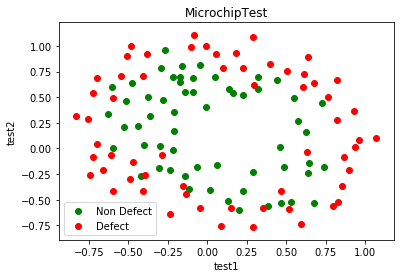

In [11]:
X = data.iloc[:,:2].values        # instances
y = 2 * data.iloc[:,2].values-1   # labels

# Plot the data 
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Non Defect')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Defect')
plt.xlabel("test1")
plt.ylabel("test2")
plt.title('MicrochipTest')
plt.legend()
y.shape

#### Exercise 2.1 (sklearn)

Use the sklearn package LogisticRegression again to implement a simple logistic regression classifier clf. Consider the cases, where the regularization parameter is chosen to be: $C=0.01;C=0.1; C=1; C=100$. In each case compute the accuracy on the training sample. What do you observe?

In [12]:
####################
# INSERT CODE HERE #
####################
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=100)
clf.fit(X,y)

# by increasing lambda value we are shifting our prediction to right

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We use a function plot_boundary to plot the decision boundary of the trained model.

In [13]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    # clf: trained model
    # X: instances
    # y: labels
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step))
    
    if poly_featurizer == None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, cmap = plt.cm.Paired)

If everything went well, we can now have a look at the decision boundary of the trained model together with the data. What do you observe?

accuracy: 0.551


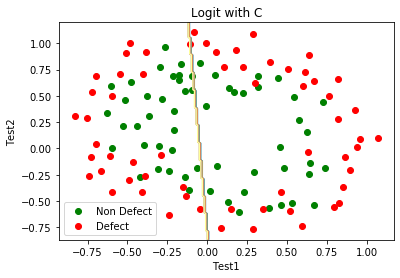

In [14]:
plot_boundary(clf, X, y, grid_step=.01)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Non Defect')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Defect')
plt.xlabel("Test1")
plt.ylabel("Test2")
plt.title('Logit with C')
plt.legend();

print("accuracy:", round(clf.score(X, y), 3))

#### Exercise 2.2 (Polynomial features)

As you have seen the performance of simple logistic regression for linearly not separable data is quite poor. Polynomial features for 2-dimensional vector $x = (x_{1},x_{2})$ of dimension $r$ would be the set of features: 
$$\{x_{1}^{i}x_{2}^{j}\}_{i+j\leq r, 0 \leq i,j \leq r}.$$

For example for $r=2$ the polynomial features for $x=\{x_{1},x_{2}\}$ would be: 
$$\{1,x_{1},x_{2},x_{1}x_{2},x_{1}^{2},x_{2}^{2}\}$$

Compute polynomial features of degree $r=3$. Use the sklearn package PolynomialFeatures to produce polynomial features for the instances $\mathbb{X}$ (Hint: method "fit_transform" will be useful).

In [31]:
from sklearn.preprocessing import PolynomialFeatures

####################
# INSERT CODE HERE #
####################
poly = PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X)

#### Exercise 2.3

Now train a logistic regression model clf_2 using the polynomial features.

In [34]:
####################
# INSERT CODE HERE #
####################
for c in [0.1,1,10,100]:
    clf_2 = LogisticRegression(C=c)
    clf_2.fit(X_poly,y)
    print(clf_2.score(X_poly,y))

0.6949152542372882
0.8050847457627118
0.8389830508474576
0.847457627118644


Let's evaluate and plot the decision boundary again. What do you observe?

Prediction Score: 0.847


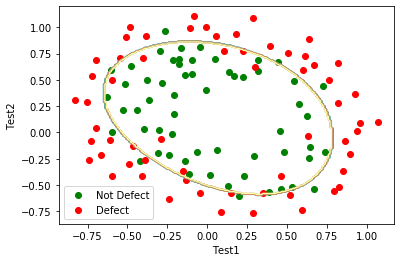

In [35]:
plot_boundary(clf_2, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Not Defect')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Defect')
plt.xlabel("Test1")
plt.ylabel("Test2")
#plt.title('Logit with C= {}'.format(C))
plt.legend();

print("Prediction Score:", 
round(clf_2.score(X_poly, y), 3))

In [ ]:
# we got best accuracy by increasing value of C. it shifted prediction to right